# SVM 支持向量机
- 与传统算法进行对比实验
- 软间隔的作用：解决 SVM 过拟合 
- 核函数的作用

In [58]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### SVM 带来的效果

In [59]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data'][:, (2, 3)]
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X, y)


SVC(C=inf, kernel='linear')

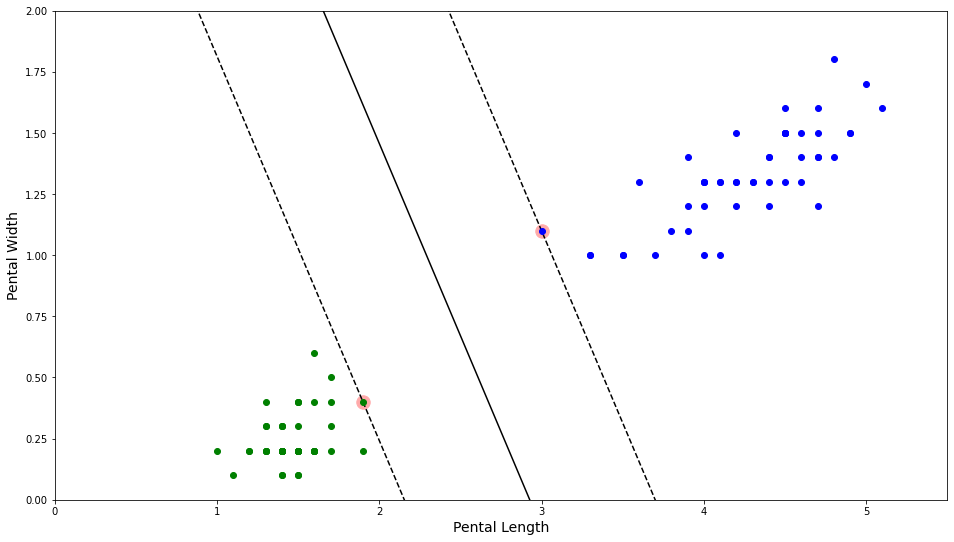

In [61]:
# 一般的模型
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1*x0 + 0.5


def plot_svm_decision_boundary(svm_clf, xmin, xmax, sv=True):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    if sv:
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#ffaaaa')
    plt.plot(x0, decision_boundary, 'k-')
    plt.plot(x0, gutter_up, 'k--')
    plt.plot(x0, gutter_down, 'k--')

plt.figure(figsize=(16,9))
# plt.subplot(121)
# plt.plot(X[:,0][y==1], X[:,1][y==1], 'bo')
# plt.plot(X[:,0][y==0], X[:,1][y==0], 'go')
# plt.plot(x0, pred_1, 'g-')
# plt.plot(x0, pred_2, 'm-')
# plt.plot(x0, pred_3, 'r-')
# plt.xlabel('Pental Length', fontsize=14)
# plt.ylabel('Pental Width', fontsize=14)
# plt.axis([0,5.5,0,2])

# plt.subplot(122)
plot_svm_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bo')
plt.plot(X[:,0][y==0], X[:,1][y==0], 'go')
plt.xlabel('Pental Length', fontsize=14)
plt.ylabel('Pental Width', fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()


### 软间隔
使用超参数 $C$ 控制软间隔程度

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X = iris['data'][:, (2,3)]
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline((
    ('std', StandardScaler()),
    ('linear_svc', LinearSVC(C=1))))

svm_clf.fit(X, y)

Pipeline(steps=[('std', StandardScaler()), ('linear_svc', LinearSVC(C=1))])

对比不同 $C$ 值所带来的效果差异

In [40]:
scaler = StandardScaler(with_mean=True)
svm_clf1 = LinearSVC(C=1, random_state=42)
svm_clf2 = LinearSVC(C=100, random_state=42)

scaled_clf1 = Pipeline((
    ('std', StandardScaler()),
    ('linear_svc', svm_clf1)))

scaled_clf2 = Pipeline((
    ('std', StandardScaler()),
    ('linear_svc', svm_clf2)))
scaler.fit(X, y)
scaled_clf1.fit(X, y)
scaled_clf2.fit(X, y)

Pipeline(steps=[('std', StandardScaler()),
                ('linear_svc', LinearSVC(C=100, random_state=42))])

In [41]:
b1 = svm_clf1.decision_function([- scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_/scaler.scale_])
w1 = svm_clf1.coef_[0]/scaler.scale_
w2 = svm_clf2.coef_[0]/scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])


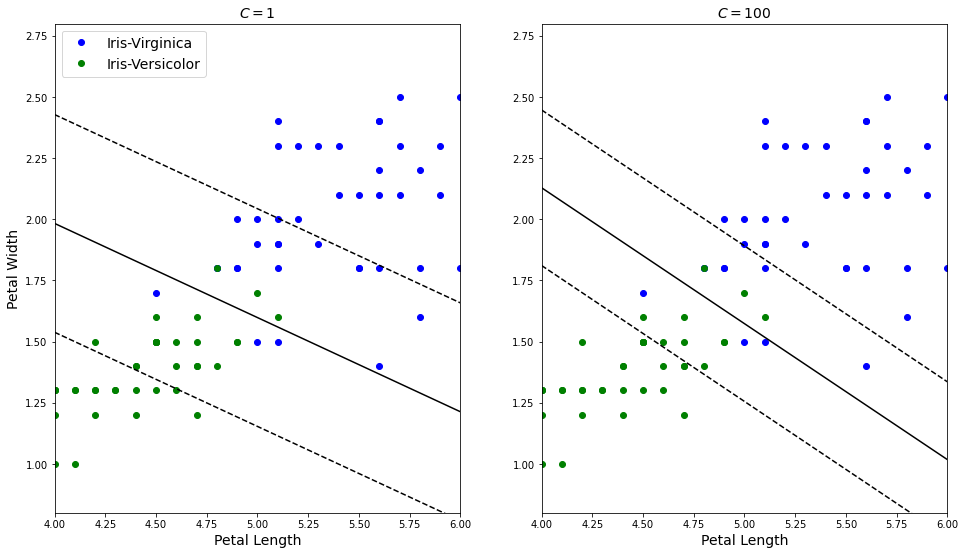

In [42]:
plt.figure(figsize=(16, 9))
plt.subplot(121)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bo', label='Iris-Virginica')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'go', label='Iris-Versicolor')
plot_svm_decision_boundary(svm_clf1, 4, 6, sv=False)
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.title('$C={}$'.format(svm_clf1.C), fontsize=14)
plt.axis([4, 6, 0.8, 2.8])


plt.subplot(122)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bo')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'go')
plot_svm_decision_boundary(svm_clf2, 4, 6, sv=False)
plt.xlabel('Petal Length', fontsize=14)
plt.title('$C={}$'.format(svm_clf2.C), fontsize=14)
plt.axis([4, 6, 0.8, 2.8])

plt.show()


- $C=1$ 时，使用较低的 $C$ 值， 间隔要大得多，但很多实例最终会出现在间隔之内
- $C=100$ 时， 使用较高的 $C$ 值， 分类器会减少误分类，但最终会有较小的间隔

### 非线性SVM

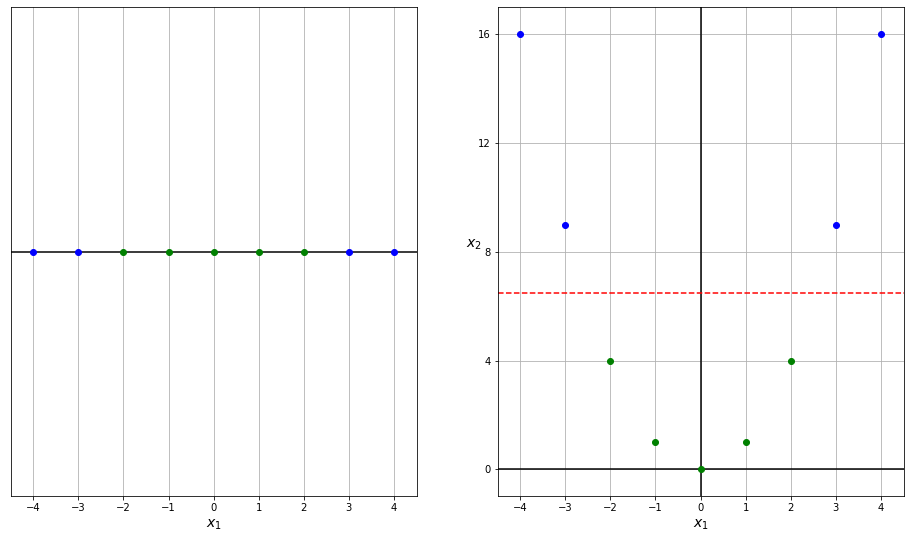

In [45]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(16, 9))
plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y == 0], np.zeros(4), 'bo')
plt.plot(X1D[:, 0][y == 1], np.zeros(5), 'go')
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r'$x_1$', fontsize=14)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y == 0], X2D[:, 1][y == 0], 'bo')
plt.plot(X2D[:, 0][y == 1], X2D[:, 1][y == 1], 'go')
plt.xlabel(r'$x_1$', fontsize=14)
plt.ylabel(r'$x_2$', fontsize=14, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], 'r--')
plt.axis([-4.5, 4.5, -1, 17])
plt.show()


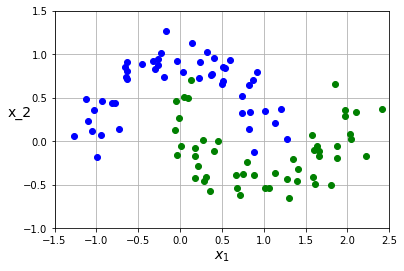

In [46]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)


def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bo')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'go')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r'$x_1$', fontsize=14)
    plt.ylabel(r'x_2', fontsize=14, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()


In [47]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline((
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))))

polynomial_svm_clf.fit(X, y)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

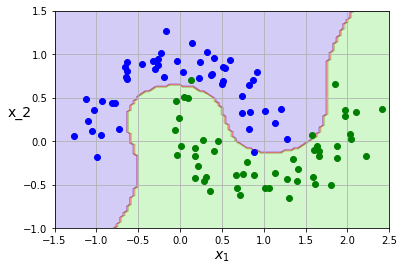

In [52]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)

    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

### 核函数

In [50]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
    ('saler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))))

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('saler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [51]:
poly100_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=10, coef0=100, C=5))))

poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

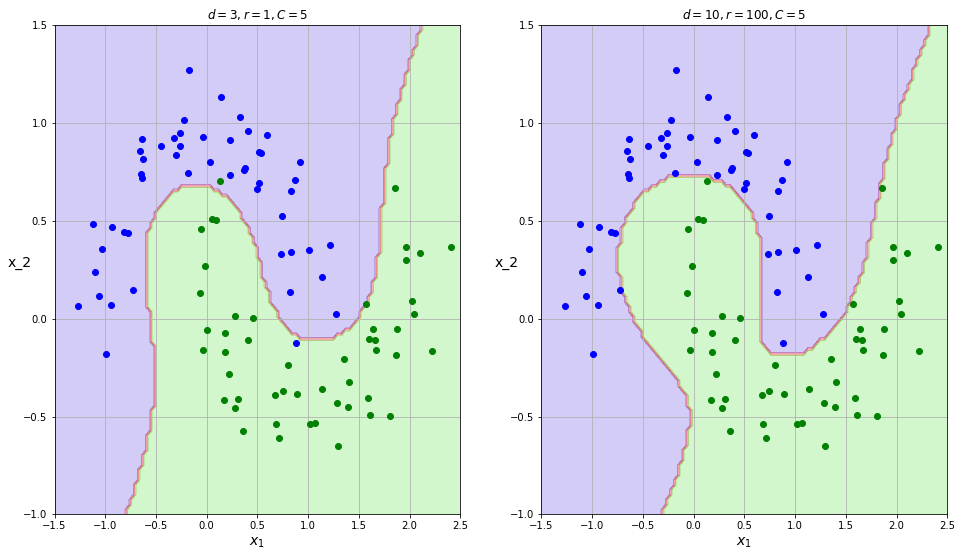

In [53]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r'$d=3, r=1, C=5$')

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r'$d=10, r=100, C=5$')

plt.show()

#### 高斯核函数：
- 利用相似度来变换特征
- 选择一份一维数据， 并在 $x_1=-2$ 和 $x_1=1$ 处为其添加两个高斯函数
- 将相似度函数定义为 $\gamma=0.3$ 的径向基函数 （RBF）$$\phi\gamma(x,\ell)=exp(-\gamma||x-\ell||^2)$$
  例如： $x_1=-1$ 位于距第一个地表距离为 $1$ 的地方，距第二个地表距离为 $2$。因此，其新特征是 $x_2=exp(-0.3\times1^2)\approx0.74$ 并且 $x_3=exp(-0.3\times2^2)\approx0.30$。

- 增加 $\gamma$ 使高斯曲线变窄，因此每个实例的影响范围都较小，决策边界最终变得更不规则，过拟合风险增大
- 减少 $\gamma$ 使高斯曲线变宽，因此实例具有更大的影响范围，并且决策边界更加平滑

In [54]:
rbf_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))))

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

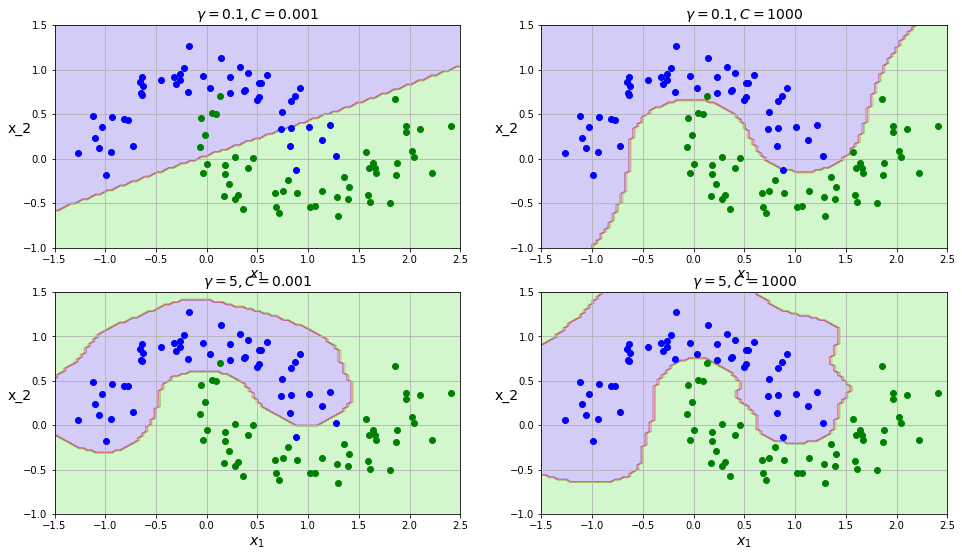

In [55]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline((
        ('scaler', StandardScaler()),
        ('svm_clf', SVC(kernel='rbf', gamma=gamma, C=C))))

    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(16,9))
for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221+i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r'$\gamma = {}, C = {}$'.format(gamma, C), fontsize=14)

plt.show()